# ***Multi- Class Dog Breed Classification***

## 1. Problem
Identifying the breed of the Dog.

## 2. Data
 The data is present in Kaggle's Dog Breed Identification Competition

## 3. Features
* We are dealing with image classification which Unstructured Data so we will use deep learning / transfer learning.
* We are classifying the breeds of the dogs into 120 different types of breeds which is provided in the problem statement on Kaggle.
* Both the training and test set contains 10,000+ images in each.

In [1]:
#!unzip "/content/drive/MyDrive/Dog-Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog-Vision/"

## Importing the necessary tools for the Program

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tf_keras as keras
import tensorflow_hub as hub
import datetime
import os
# Check for a GPU
print("GPU","available" if tf.config.list_physical_devices("GPU") else "not available")

GPU available


## Getting Our Data Ready by turning it into Tensors

In [3]:
label_csv = pd.read_csv("/content/drive/MyDrive/Dog-Vision/labels.csv")

In [4]:
label_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126

In [5]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

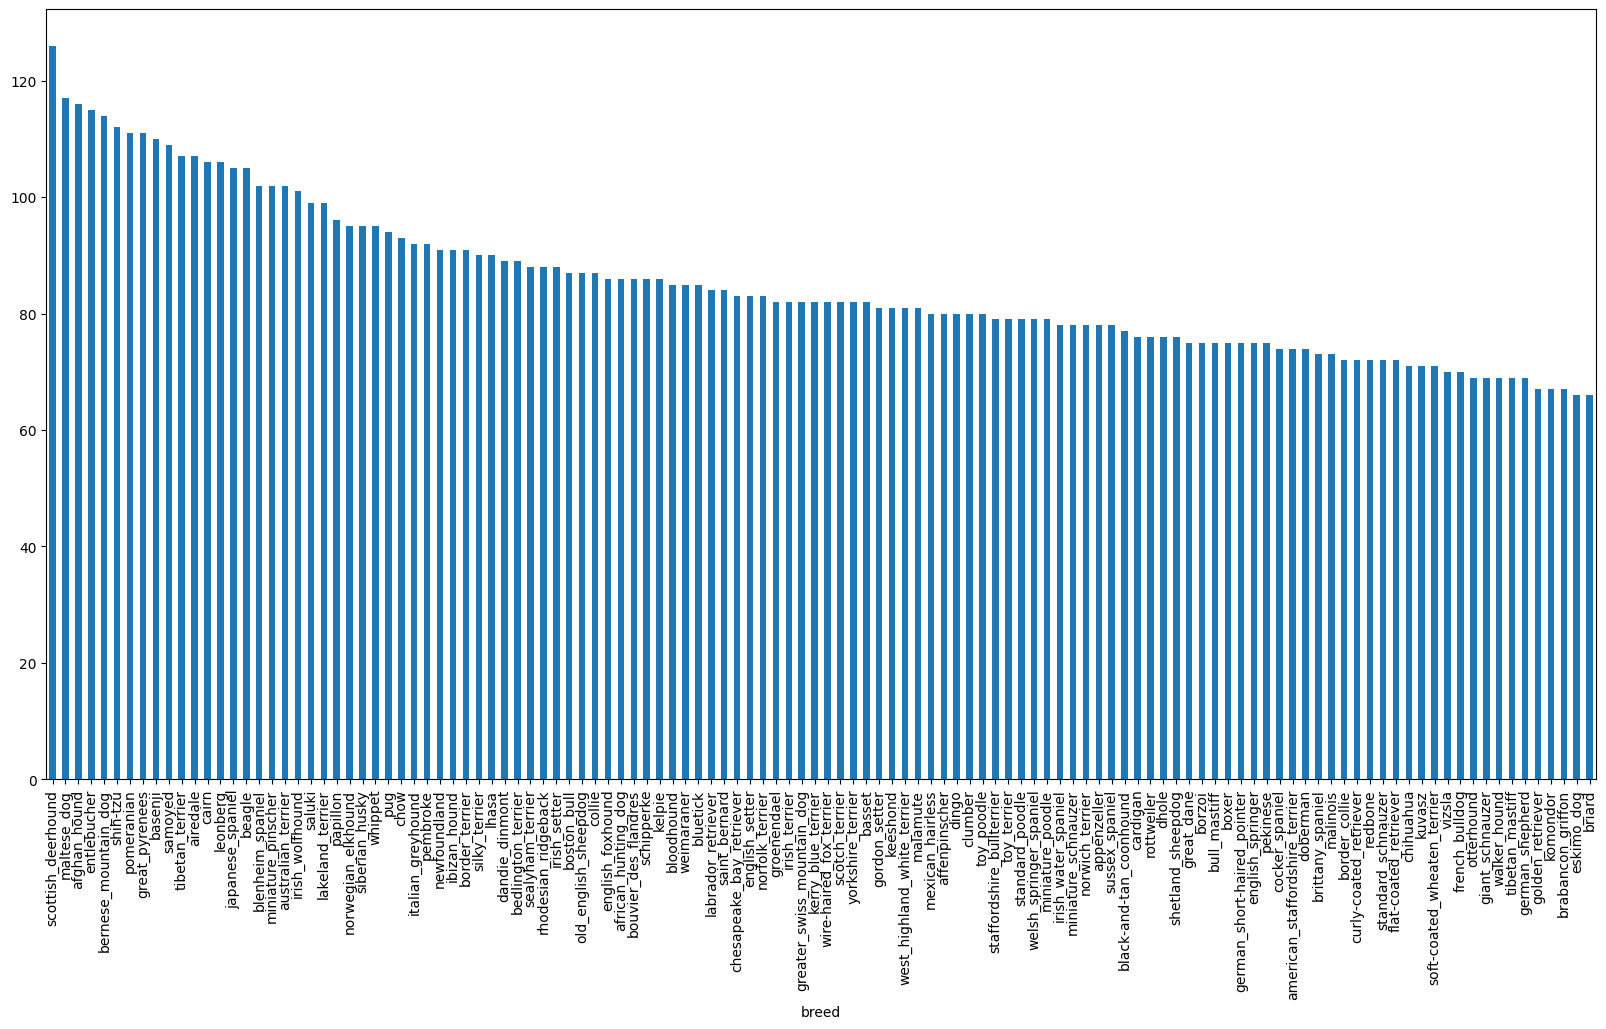

In [6]:
label_csv["breed"].value_counts().plot.bar(figsize=(20,10));

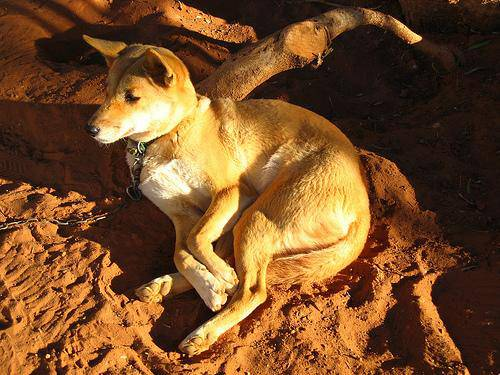

In [7]:
from IPython.display import Image
Image("/content/drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg",width=400,height=300)

## Getting Image and their Labels

In [8]:
label_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [9]:
# Create a list of the filenames which contains the names of the images
filename = ["/content/drive/MyDrive/Dog-Vision/train/" + fname + ".jpg" for fname in label_csv["id"]]
filename[:10]

['/content/drive/MyDrive/Dog-Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Dog-Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [10]:
# Check if the filenames works flawlessly with the real image paths
import os
if len(os.listdir("drive/MyDrive/Dog-Vision/train/")) == len(filename):
  print("Matches")
else:
  print("Do not match")

Matches


In [11]:
labels = label_csv["breed"].to_numpy()
# labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [12]:
# Find the unique label value
unique_breeds = np.unique(labels)
len(unique_breeds)


120

### Turning every label into Boolean Array

In [13]:
boolean_label = [label == unique_breeds for label in labels]
boolean_label[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
len(boolean_label)

10222

### Creating the Validation Set

In [15]:
X = filename
y = boolean_label

We are going to create a validation step with somewhere around ~1000 images and it can be increased below

In [16]:
NUM_IMAGES = 1000 #@param{type:"slider",min:1000,max:10000,step:100}

In [17]:
from sklearn.model_selection import train_test_split
X_val,X_train,y_val,y_train = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], train_size = 0.2, random_state = 42)
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [18]:
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Dog-Vision/train/0ca9280205bd68d201e1d708db3f209d.jpg',
  '/content/drive/MyDrive/Dog-Vision/train/12405b2e93417d81f5308769c4e184c7.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

### Preprocessing Image (Turning Images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:

* Takes an image filename as input.
* Uses TensorFlow to read the file and save it to a variable, `image`.
* Turn our `image` (a jpeg file) into Tensors.
* Resize the `image` to be of shape (224, 224).
* Return the modified `image`.

In [19]:
from matplotlib.pyplot import imread
image = imread(filename[0])
print(image.shape)

(375, 500, 3)


In [20]:
tf.constant(image)

<tf.Tensor: shape=(375, 500, 3), dtype=uint8, numpy=
array([[[108,  46,   0],
        [152,  92,  42],
        [180, 120,  70],
        ...,
        [176, 144,  69],
        [189, 157,  82],
        [214, 182, 107]],

       [[151,  93,  47],
        [179, 121,  75],
        [167, 111,  64],
        ...,
        [167, 136,  56],
        [172, 139,  60],
        [188, 157,  77]],

       [[151,  98,  56],
        [188, 137,  94],
        [162, 113,  70],
        ...,
        [200, 168,  81],
        [196, 162,  75],
        [200, 168,  81]],

       ...,

       [[189, 122,  69],
        [186, 119,  66],
        [183, 116,  63],
        ...,
        [213, 160, 106],
        [212, 159, 107],
        [209, 156, 102]],

       [[186, 119,  66],
        [184, 117,  64],
        [183, 116,  63],
        ...,
        [197, 145,  88],
        [199, 146,  92],
        [199, 147,  90]],

       [[182, 115,  62],
        [181, 114,  61],
        [183, 116,  63],
        ...,
        [184, 132,  7

#### Function for Preprocessing the Images into Tensors for the Model to Train on

In [21]:
IMG_SIZE = 224
def process_image(image_path, IMG_SIZE = IMG_SIZE):
  # Read an image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensors with 3 Color Channels (Red, Green and Blue) format
  image = tf.image.decode_jpeg(image, channels = 3)
  # Normalise the colour values ranging from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image so that it can be operated on by our model which only accept (224,224) size images
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

### Turning Our Data into Batches

In [22]:
# Making a simple function for turning our data into tuples like (image, label)
def get_image_label(image_path, label):
  image = process_image(image_path)
  return image, label

In [23]:
BATCH_SIZE = 32

def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data.

  Args:
    X: A list of image file paths or a dataset of image file paths.
    y: A list of labels or a dataset of labels.
    batch_size: The batch size.
    valid_data: Whether the data is validation data.
    test_data: Whether the data is test data.

  Returns:
    A dataset of batches of data.
  """
  if test_data:
    print("Creating test batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Pass X directly
    data_batch = data.map(process_image).batch(batch_size) # Only process image, no labels for test
    return data_batch

  elif valid_data:
    print("Creating validation batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

  else:
    print("Creating training batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
    data = data.shuffle(buffer_size=len(X))
    data_batch = data.map(get_image_label).batch(batch_size)
    return data_batch

### Visualizing Data Batches

In [24]:
# Create a function for viewing images in a data batch
def show_25_images(images, labels):
  """
  Displays 25 images from a data batch.
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))
  # Loop through 25 (for displaying 25 images)
  for i in range(25):
    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn gird lines off
    plt.axis("off")

In [25]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training batches...
Creating validation batches...


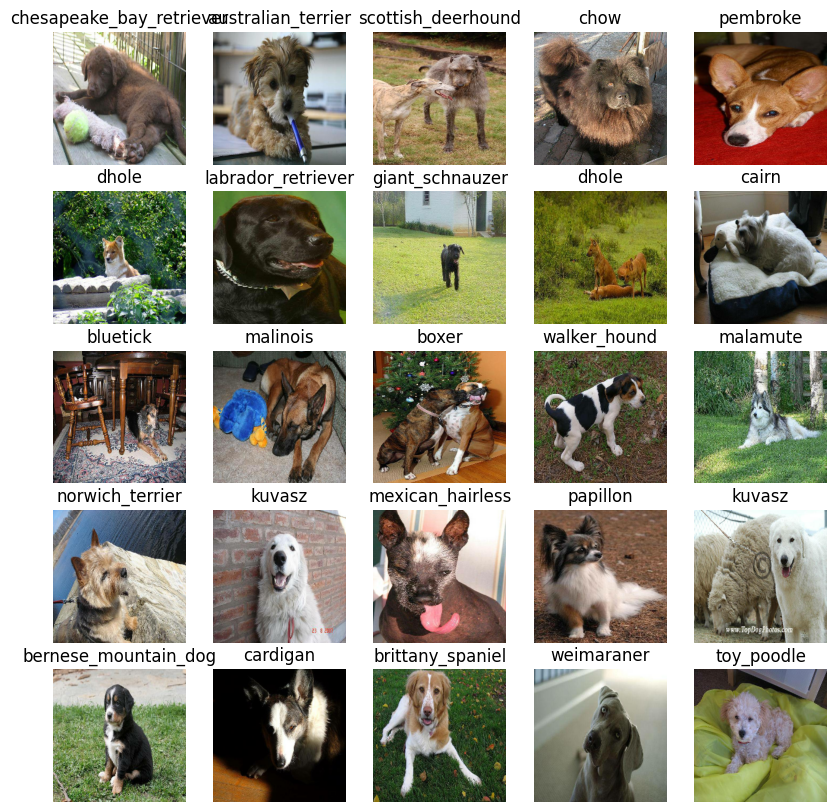

In [26]:
train_images, train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images, train_labels)

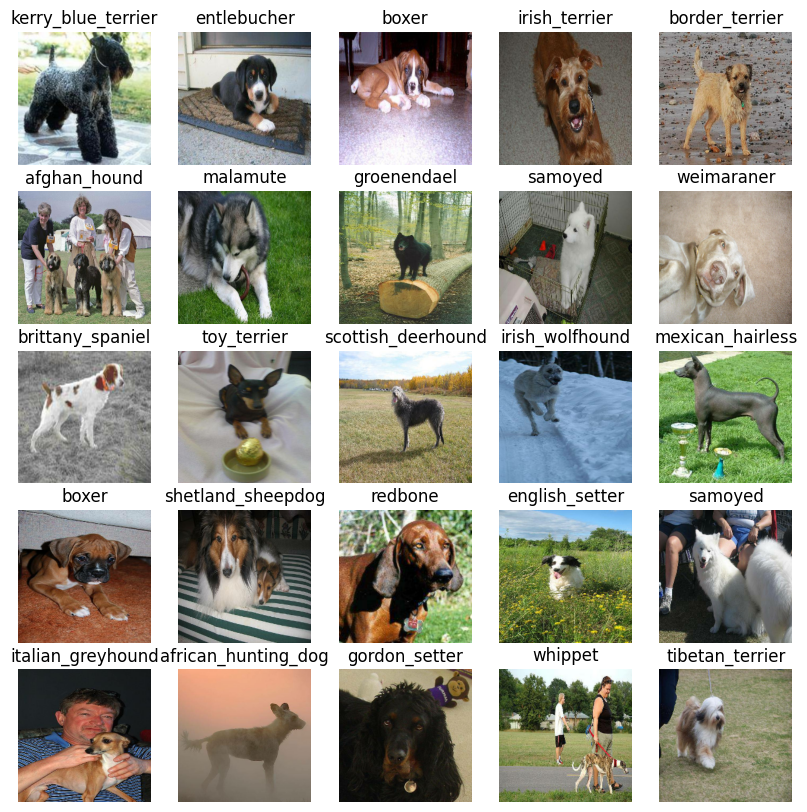

In [27]:
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [28]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

In [29]:
import tf_keras as keras
import tensorflow_hub as hub

# Define input size
IMG_SIZE = 224  # Ensure this matches the model’s expected input size
INPUT_SHAPE = (IMG_SIZE, IMG_SIZE, 3)  # Excluding batch dimension
OUTPUT_SHAPE = len(unique_breeds)  # Number of unique classes

# Correct model URL (Ensure this is valid for your use case)
MODEL_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building model with:", model_url)

    # Define the model
    model = keras.Sequential([
        hub.KerasLayer(model_url, input_shape=input_shape, trainable=False),  # Pretrained feature extractor
        keras.layers.Flatten(),  # Flatten before passing to Dense layer
        keras.layers.Dense(units=output_shape, activation="softmax")  # Output layer
    ])

    # Compile the model
    model.compile(
        loss=keras.losses.CategoricalCrossentropy(),
        optimizer=keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    return model

# Create a model and check its details
model = create_model()
model.summary()


Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 flatten (Flatten)           (None, 1001)              0         
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [30]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [31]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 50 #@param {type:"slider", min:10, max:100, step:10}

In [32]:
# Create early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)

# Create TensorBoard callback
def create_tensorboard_callback():
    logdir = os.path.join("drive/MyDrive/Dog-Vision/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return keras.callbacks.TensorBoard(log_dir=logdir)  # ✅ Corrected


In [33]:
def train_model():
    model = create_model()

    # Create a fresh TensorBoard callback
    tensorboard = create_tensorboard_callback()

    # Train the model
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data=val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])  # ✅ Corrected

    return model

# Start training
model = train_model()


Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4
Epoch 1/10
25/25 [==============================] - 139s 3s/step - loss: 4.5585 - accuracy: 0.1013 - val_loss: 3.3203 - val_accuracy: 0.2300
Epoch 2/10
25/25 [==============================] - 4s 176ms/step - loss: 1.5090 - accuracy: 0.7038 - val_loss: 2.1003 - val_accuracy: 0.5300
Epoch 3/10
25/25 [==============================] - 4s 145ms/step - loss: 0.4836 - accuracy: 0.9513 - val_loss: 1.6798 - val_accuracy: 0.5750
Epoch 4/10
25/25 [==============================] - 4s 177ms/step - loss: 0.2093 - accuracy: 0.9962 - val_loss: 1.5569 - val_accuracy: 0.5950
Epoch 5/10
25/25 [==============================] - 4s 159ms/step - loss: 0.1264 - accuracy: 0.9987 - val_loss: 1.4961 - val_accuracy: 0.6000
Epoch 6/10
25/25 [==============================] - 6s 225ms/step - loss: 0.0878 - accuracy: 0.9987 - val_loss: 1.4691 - val_accuracy: 0.5950
Epoch 7/10
25/25 [==============================] - 6s 219ms/

In [37]:
predictions = model.predict(val_data, verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 1s 94ms/step


array([[1.6391438e-03, 3.6533418e-04, 1.8465039e-04, ..., 1.9565824e-04,
        3.0737624e-03, 9.1126171e-04],
       [3.0008782e-04, 4.1441747e-04, 4.2790826e-04, ..., 5.2240130e-04,
        9.0619369e-04, 1.5011219e-04],
       [2.1889879e-04, 3.5409373e-04, 6.5711174e-05, ..., 5.7211390e-04,
        6.6666766e-03, 2.4051465e-04],
       ...,
       [1.3947691e-03, 1.0869806e-01, 9.3806339e-05, ..., 1.8100865e-04,
        1.8376263e-04, 1.5580034e-04],
       [1.9523217e-05, 4.2170152e-05, 4.7680815e-06, ..., 6.1920997e-05,
        1.9644848e-04, 2.4318560e-04],
       [8.2750930e-06, 1.8363989e-04, 4.5332115e-05, ..., 1.3879115e-04,
        1.2884961e-01, 1.5174988e-02]], dtype=float32)

In [38]:
predictions.shape

(200, 120)

In [39]:
# First prediction
print(predictions[0])
print(f"Max value (probability of prediction): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum: {np.sum(predictions[0])}") # because we used softmax activation in our model, this will be close to 1
print(f"Max index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}") # the predicted label

[1.63914380e-03 3.65334185e-04 1.84650387e-04 1.08359335e-02
 1.33679525e-04 2.09618872e-03 1.43927778e-03 2.49957899e-04
 3.23940214e-04 2.33200568e-04 4.31270804e-03 1.34619453e-03
 4.49367624e-04 3.85826197e-03 1.78537826e-04 5.91691863e-03
 9.06310743e-05 2.94072065e-03 9.99475713e-04 4.12768190e-04
 3.13182771e-02 3.35575780e-03 1.39625429e-03 7.64472643e-04
 1.99460759e-04 1.00915681e-03 7.64041964e-04 2.35952181e-03
 2.85872142e-04 2.79702625e-04 1.09946402e-03 3.05877271e-04
 1.12316782e-04 2.77694874e-03 6.03046734e-03 2.08597950e-04
 5.91137155e-04 8.74636520e-04 3.07166297e-03 5.01128053e-03
 2.75709550e-04 5.72107034e-04 9.32646682e-04 1.42377117e-04
 3.02167435e-04 9.25496046e-04 4.40378615e-04 1.24815363e-03
 2.07231008e-03 1.47287734e-04 4.61938442e-04 6.70967856e-04
 2.60346005e-05 1.68494717e-03 6.63612009e-05 8.61543085e-05
 3.54774820e-04 4.01986064e-04 9.26319393e-04 4.37478418e-04
 7.84846416e-05 2.76626623e-03 2.17819004e-04 2.39549298e-03
 7.40661681e-01 1.641822

In [40]:
 #Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0])
pred_label

'kerry_blue_terrier'

In [41]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = []
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.95294124, 0.9843138 , 0.9921569 ],
         [0.9600491 , 0.99497557, 0.9921569 ],
         [0.97401965, 0.99938726, 0.9921569 ],
         ...,
         [0.9357844 , 0.96740204, 0.75294125],
         [0.943505  , 0.9541667 , 0.7466912 ],
         [0.89019614, 0.89019614, 0.6862745 ]],
 
        [[0.95625883, 0.9876314 , 0.9954745 ],
         [0.9603601 , 0.9952866 , 0.99246794],
         [0.97401965, 0.99938726, 0.9921569 ],
         ...,
         [0.9398277 , 0.9681277 , 0.76693726],
         [0.93355227, 0.9408964 , 0.7466912 ],
         [0.8802434 , 0.8769258 , 0.6862745 ]],
 
        [[0.9626926 , 0.98532045, 0.9960785 ],
         [0.9688882 , 0.9950699 , 0.9951662 ],
         [0.9778455 , 0.99938726, 0.9950718 ],
         ...,
         [0.95604926, 0.98083043, 0.80337125],
         [0.95241797, 0.9562432 , 0.7906882 ],
         [0.90175074, 0.89491427, 0.7329132 ]],
 
        ...,
 
        [[0.546524  , 0.6092691 , 0.6720142 ],
         [0.56602305, 0.62876815, 0.69151

In [42]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

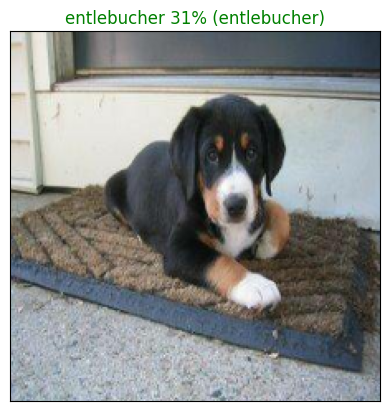

In [43]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images)


In [44]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

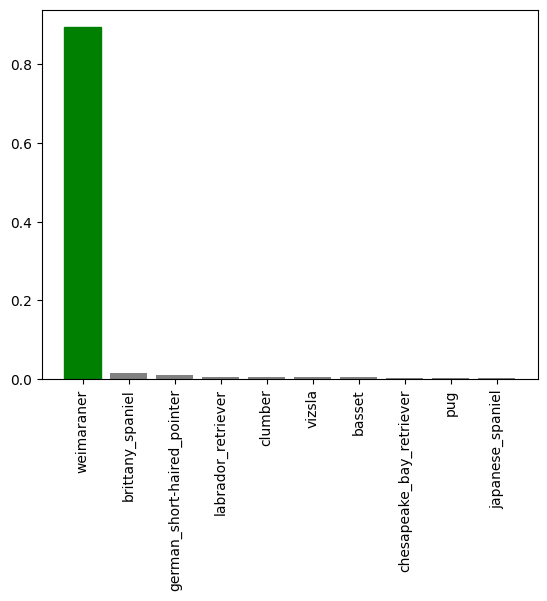

In [45]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

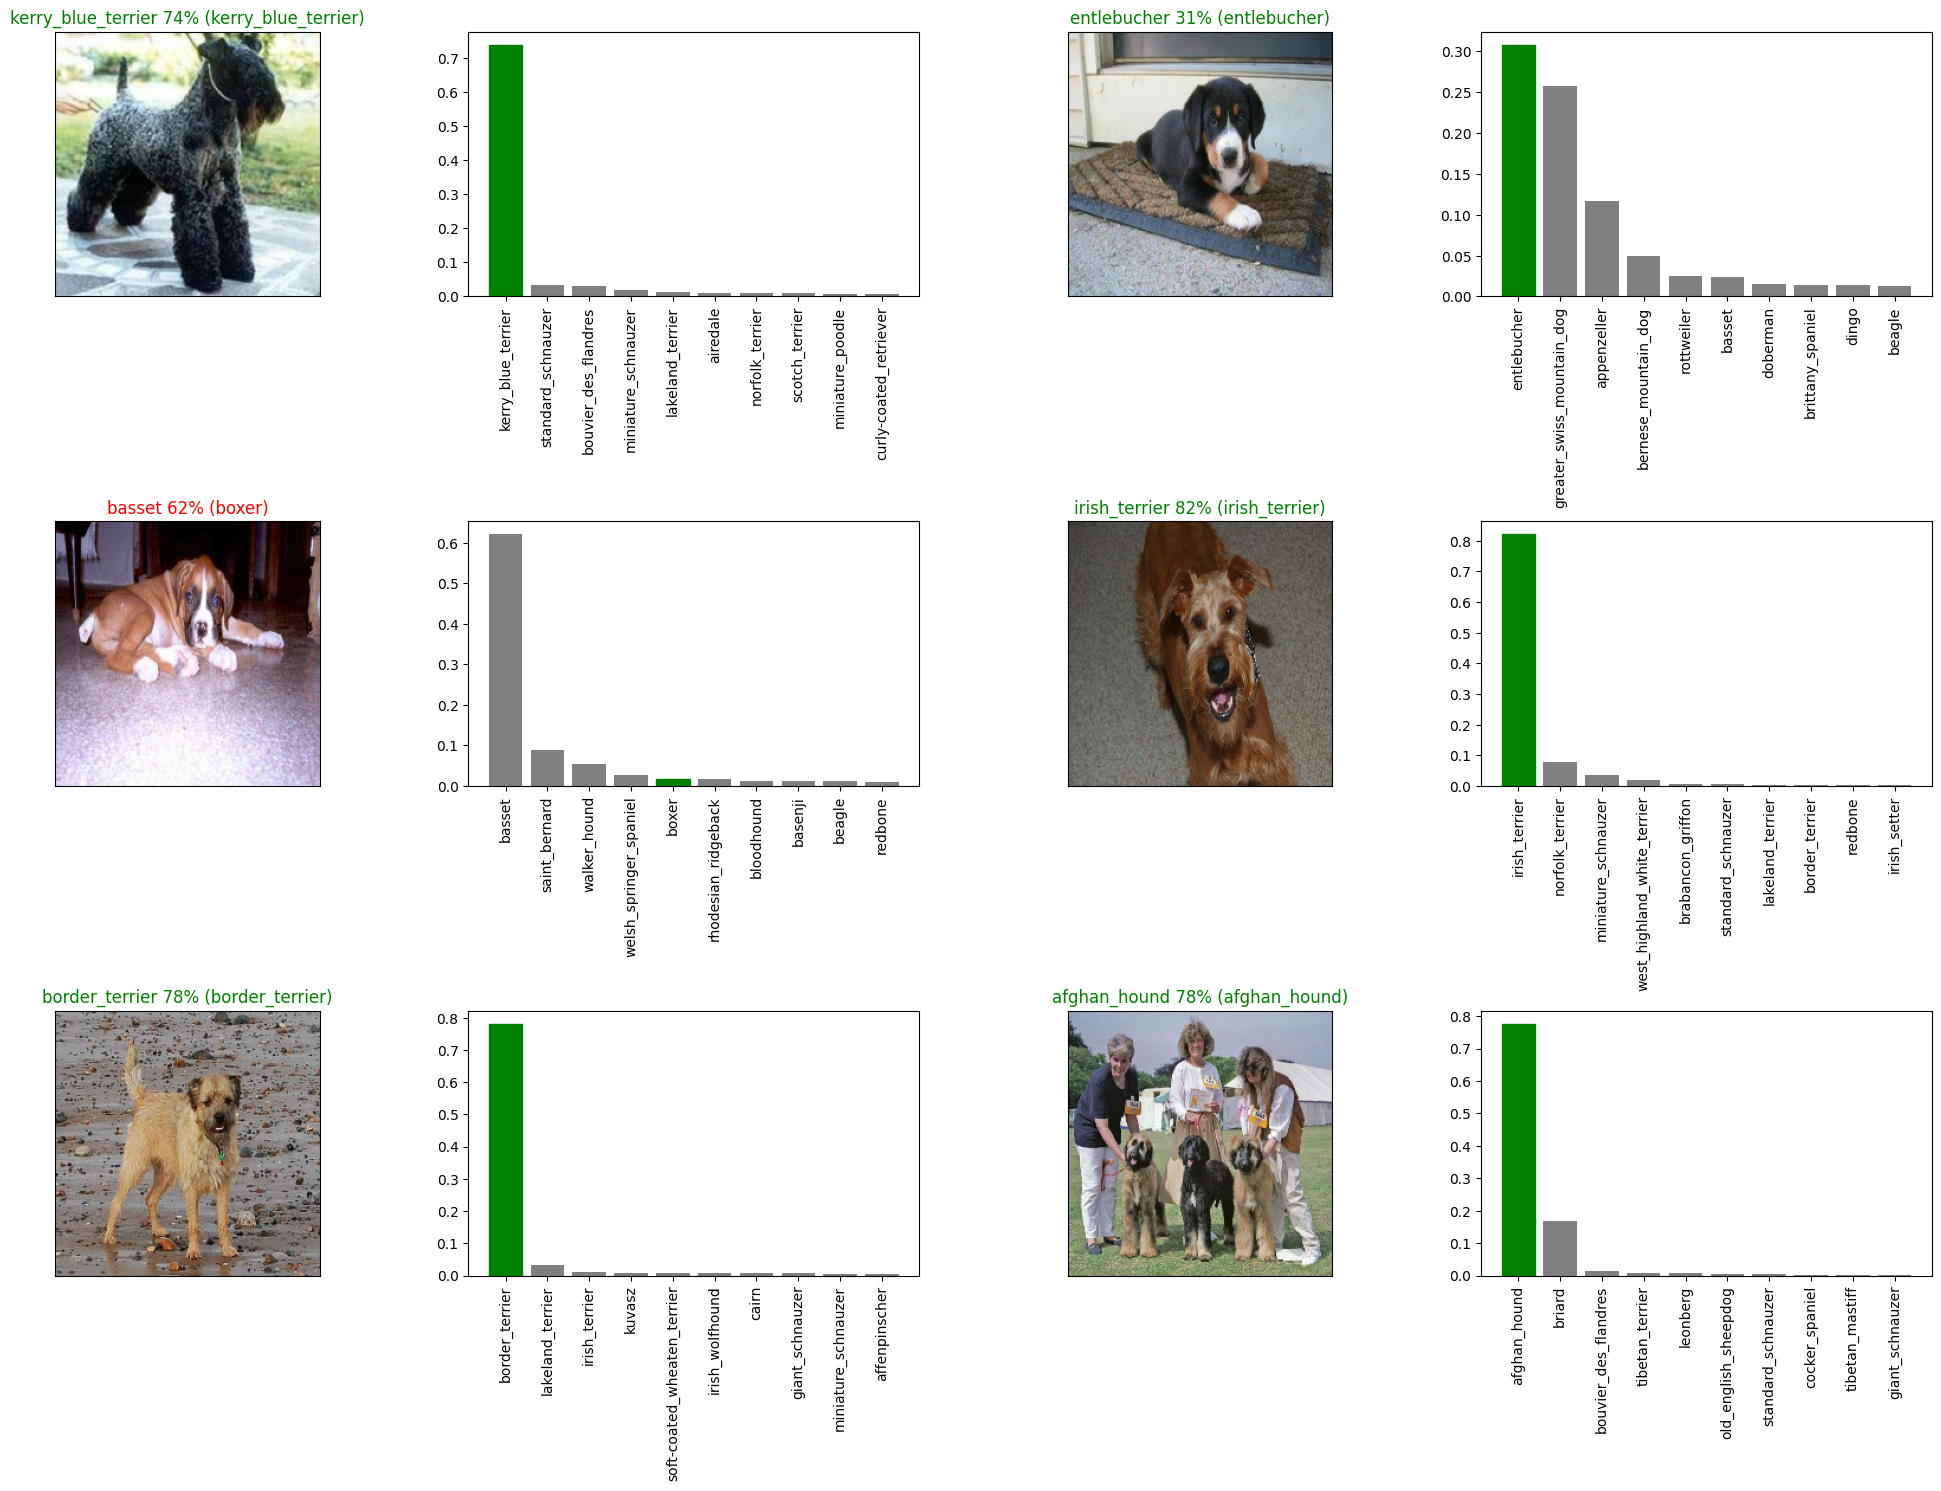

In [46]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

### Saving and reloading a model

In [47]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/Dog-Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [48]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf_keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [49]:
save_model(model, suffix="1000-images-Adam")

Saving model to: drive/My Drive/Dog-Vision/models/20250206-13361738848976-1000-images-Adam.h5...


/usr/local/lib/python3.11/dist-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'drive/My Drive/Dog-Vision/models/20250206-13361738848976-1000-images-Adam.h5'

In [50]:
import tf_keras as keras
import os
import datetime
import tensorflow_hub as hub

def save_model(model, suffix=None):
    """
    Saves a given model in a models directory and appends a suffix (str) for clarity and reuse.
    """
    # Create model directory with current time
    modeldir = os.path.join(
        "drive/My Drive/Data/models",
        datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    )
    os.makedirs(os.path.dirname(modeldir), exist_ok=True)  # Ensure the directory exists
    model_path = modeldir + "-" + suffix + ".h5"  # Save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading saved model from: {model_path}")
    model = keras.models.load_model(
        model_path,
        custom_objects={"KerasLayer": hub.KerasLayer}
    )
    return model

# Save the model
model_path = save_model(model, suffix="1000-images-Adam")
# Load the model
model_1000_images = load_model(model_path)
model_1000_images.summary()


Saving model to: drive/My Drive/Data/models/20250206-133616-1000-images-Adam.h5...
Loading saved model from: drive/My Drive/Data/models/20250206-133616-1000-images-Adam.h5
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              3540265   
                                                                 
 flatten_1 (Flatten)         (None, 1001)              0         
                                                                 
 dense_1 (Dense)             (None, 120)               120240    
                                                                 
Total params: 3660505 (13.96 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [51]:
model.evaluate(val_data)

7/7 [==============================] - 1s 88ms/step - loss: 1.4961 - accuracy: 0.6000


[1.4961062669754028, 0.6000000238418579]

In [52]:
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 93ms/step - loss: 1.4961 - accuracy: 0.6000


[1.4961062669754028, 0.6000000238418579]

### Training a model (on the full data)

In [53]:
full_data = create_data_batches(X, y)

Creating training batches...


In [54]:
full_model = create_model()

Building model with: https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4


In [55]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [56]:
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,
                          full_model_early_stopping])

Epoch 1/10
320/320 [==============================] - 53s 154ms/step - loss: 1.3110 - accuracy: 0.6753
Epoch 2/10
320/320 [==============================] - 48s 149ms/step - loss: 0.3735 - accuracy: 0.8861
Epoch 3/10
320/320 [==============================] - 43s 135ms/step - loss: 0.2184 - accuracy: 0.9377
Epoch 4/10
320/320 [==============================] - 42s 132ms/step - loss: 0.1387 - accuracy: 0.9672
Epoch 5/10
320/320 [==============================] - 42s 130ms/step - loss: 0.0964 - accuracy: 0.9803
Epoch 6/10
320/320 [==============================] - 43s 134ms/step - loss: 0.0696 - accuracy: 0.9867
Epoch 7/10
320/320 [==============================] - 44s 139ms/step - loss: 0.0524 - accuracy: 0.9928
Epoch 8/10
320/320 [==============================] - 44s 138ms/step - loss: 0.0415 - accuracy: 0.9949
Epoch 9/10
320/320 [==============================] - 41s 128ms/step - loss: 0.0335 - accuracy: 0.9970
Epoch 10/10
320/320 [==============================] - 43s 135ms/step - l

### Saving and reloading the full model

In [57]:
save_model(full_model, suffix="all-images-Adam")

Saving model to: drive/My Drive/Data/models/20250206-135346-all-images-Adam.h5...


'drive/My Drive/Data/models/20250206-135346-all-images-Adam.h5'

In [58]:
loaded_full_model = load_model('drive/My Drive/Data/models/20250206-135346-all-images-Adam.h5')

Loading saved model from: drive/My Drive/Data/models/20250206-135346-all-images-Adam.h5


### Making predictions on the test dataset

In [59]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "drive/My Drive/Dog-Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['drive/My Drive/Dog-Vision/test/e76a7a1d23d687b5015b07df762c0c10.jpg',
 'drive/My Drive/Dog-Vision/test/e6353a9420e1e529b6c20b9414786ae7.jpg',
 'drive/My Drive/Dog-Vision/test/e103930a8a4416f076c81a51907a7512.jpg',
 'drive/My Drive/Dog-Vision/test/e090f0f0ebc83ddf5f649a841493868b.jpg',
 'drive/My Drive/Dog-Vision/test/e0e47873420b2ed420e920a74c663233.jpg',
 'drive/My Drive/Dog-Vision/test/e60f6620bf8751538db9006d425f1b45.jpg',
 'drive/My Drive/Dog-Vision/test/dd3eb4338145e614d325a917a35e5a1e.jpg',
 'drive/My Drive/Dog-Vision/test/e70c62f51defaa5295fe3e52099c4ce3.jpg',
 'drive/My Drive/Dog-Vision/test/e5c0666aa15120eba4718ae947a52c45.jpg',
 'drive/My Drive/Dog-Vision/test/e14211c7b8cba3e46d5802291b765be7.jpg']

In [60]:
test_data = create_data_batches(test_filenames, test_data=True)

Creating test batches...


In [61]:
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 389s 1s/step


In [62]:
test_predictions[:10]

array([[1.3093217e-12, 3.0397717e-13, 2.9355274e-10, ..., 1.1421432e-09,
        2.7635925e-09, 1.9259718e-12],
       [1.6382300e-10, 4.8005209e-09, 4.6135253e-13, ..., 1.1708302e-10,
        1.1891673e-08, 3.0352235e-10],
       [3.5058019e-06, 5.1796314e-07, 1.0661707e-08, ..., 3.3621581e-07,
        1.9515501e-04, 4.5711851e-10],
       ...,
       [5.2728603e-11, 1.1598453e-08, 5.8431993e-10, ..., 2.1966326e-07,
        1.9011695e-06, 5.7182920e-10],
       [1.3256576e-12, 8.0675811e-05, 1.2675156e-09, ..., 1.6561734e-06,
        4.4087792e-11, 5.6386162e-10],
       [3.3744940e-10, 2.7936755e-11, 2.5736917e-09, ..., 4.3442085e-09,
        2.8262634e-06, 4.2359234e-06]], dtype=float32)

### Preparing test dataset predictions for Kaggle

In [63]:
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [65]:
# Append test image ID's to predictions DataFrame
test_path = "drive/My Drive/Dog-Vision/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  e76a7a1d23d687b5015b07df762c0c10           NaN          NaN   
1  e6353a9420e1e529b6c20b9414786ae7           NaN          NaN   
2  e103930a8a4416f076c81a51907a7512           NaN          NaN   
3  e090f0f0ebc83ddf5f649a841493868b           NaN          NaN   
4  e0e47873420b2ed420e920a74c663233           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [66]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e76a7a1d23d687b5015b07df762c0c10   1.309322e-12  3.039772e-13   
1  e6353a9420e1e529b6c20b9414786ae7   1.638230e-10  4.800521e-09   
2  e103930a8a4416f076c81a51907a7512   3.505802e-06  5.179631e-07   
3  e090f0f0ebc83ddf5f649a841493868b   9.495672e-09  2.196550e-07   
4  e0e47873420b2ed420e920a74c663233   2.058361e-13  1.801688e-09   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         2.935527e-10  7.724377e-12                    6.105373e-11   
1         4.613525e-13  6.657675e-08                    1.940867e-08   
2         1.066171e-08  3.463034e-05                    6.457234e-06   
3         9.615795e-06  1.055642e-06                    1.252103e-07   
4         1.794022e-11  5.870404e-10                    1.336806e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  5.070936e-10        2.461584e-09  1.426654e-05  4.649337e-09  ...   
1  1.148246e-06        3.242203e-09  3.040208e-07  3.242545e-08  ...   
2  1.902468e-05        3.024071e-07  2.531611e-06  5.073694e-06  ...   
3  4.172046e-07        1.682472e-06  1.610443e-06  6.053454e-02  ...   
4  9.853894e-12        5.841764e-14  4.310577e-11  1.614133e-12  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  5.948186e-11  2.865617e-07  2.189653e-10  1.991727e-08  5.468092e-12   
1  9.563050e-09  1.057378e-10  5.380225e-04  2.135497e-07  1.530409e-07   
2  1.811022e-03  2.405029e-07  5.726327e-06  1.509290e-06  2.102834e-06   
3  6.381686e-09  1.155403e-05  1.771296e-07  5.127664e-01  1.268009e-06   
4  5.724982e-11  2.313116e-14  5.700726e-11  6.700029e-07  1.319260e-09   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            2.611583e-11                 4.962696e-11  1.142143e-09   
1            1.343296e-10                 9.256163e-12  1.170830e-10   
2            1.086438e-06                 1.832433e-05  3.362158e-07   
3            8.469323e-07                 3.617361e-08  8.301979e-07   
4            5.009052e-11                 1.340933e-12  9.969673e-15   

   wire-haired_fox_terrier  yorkshire_terrier  
0             2.763592e-09       1.925972e-12  
1             1.189167e-08       3.035223e-10  
2             1.951550e-04       4.571185e-10  
3             2.227143e-06       1.860011e-07  
4             2.694167e-12       9.418482e-12  

[5 rows x 121 columns]

In [67]:
preds_df.to_csv("drive/My Drive/Dog-Vision/full_submission_1_mobilienetV2_adam.csv",
                 index=False)